<a href="https://colab.research.google.com/github/Mitzz07/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction_(ML_with_PY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mail : sumitgawande789@gmail.com |
Name : Sumit Santosh Gawande |
Batch : Python with Machine Learning |
Project Name : Prediction of Heart Disease |
Certificate Code : TCRIG02R03 |
Group : OWN

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATA COLLECTION AND PROCESSING**



In [5]:
heart_data = pd.read_csv('/content/heart.csv')

In [6]:
#print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_data.shape

(303, 14)

In [8]:
#defining columns
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
#some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#statistical measure about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**CHECKING FOR MISSING VALUES IN DATASET**

In [11]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
#checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

 165 are Heart disease cases
 138 are non Heart disease cases

In [13]:
heart_data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

Hence, Males are 207 and Females are 96

**FINDING THE CORRELATIONS AMONG ATTRIBUTES IN DATASET **

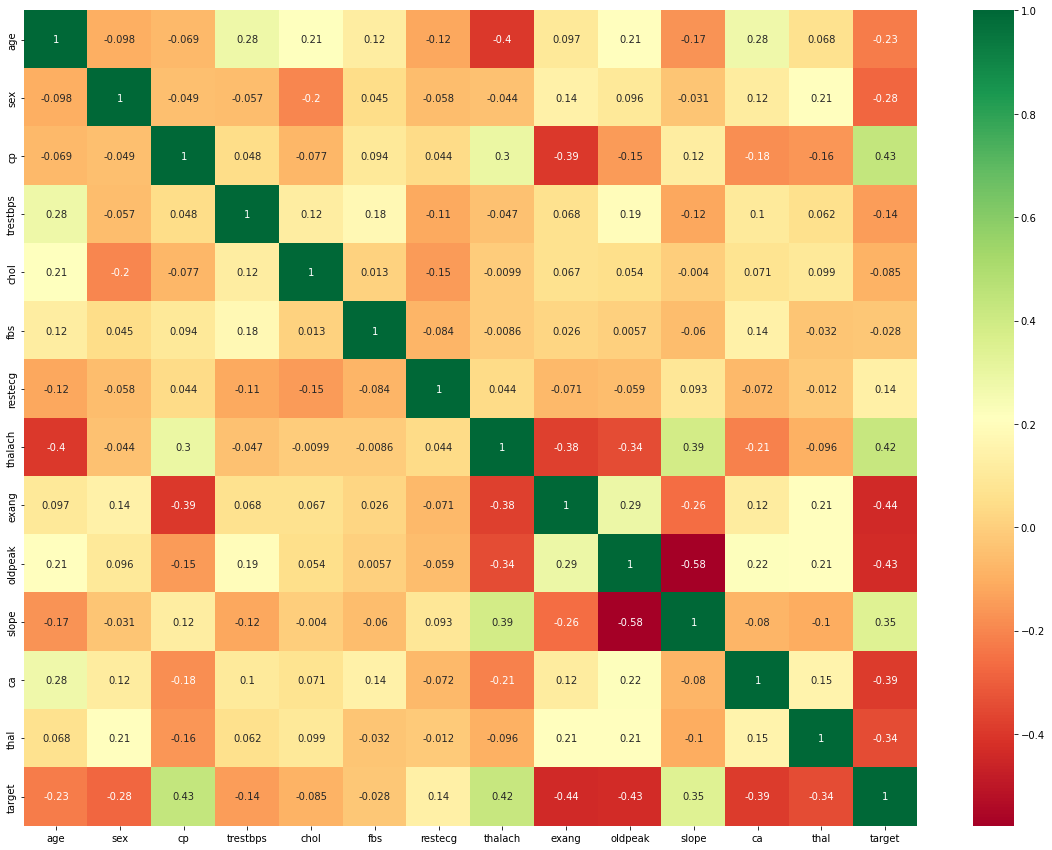

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(heart_data.corr(), annot= True, cmap='RdYlGn')

**HISTOGRAMS OF THE GIVEN DATA **



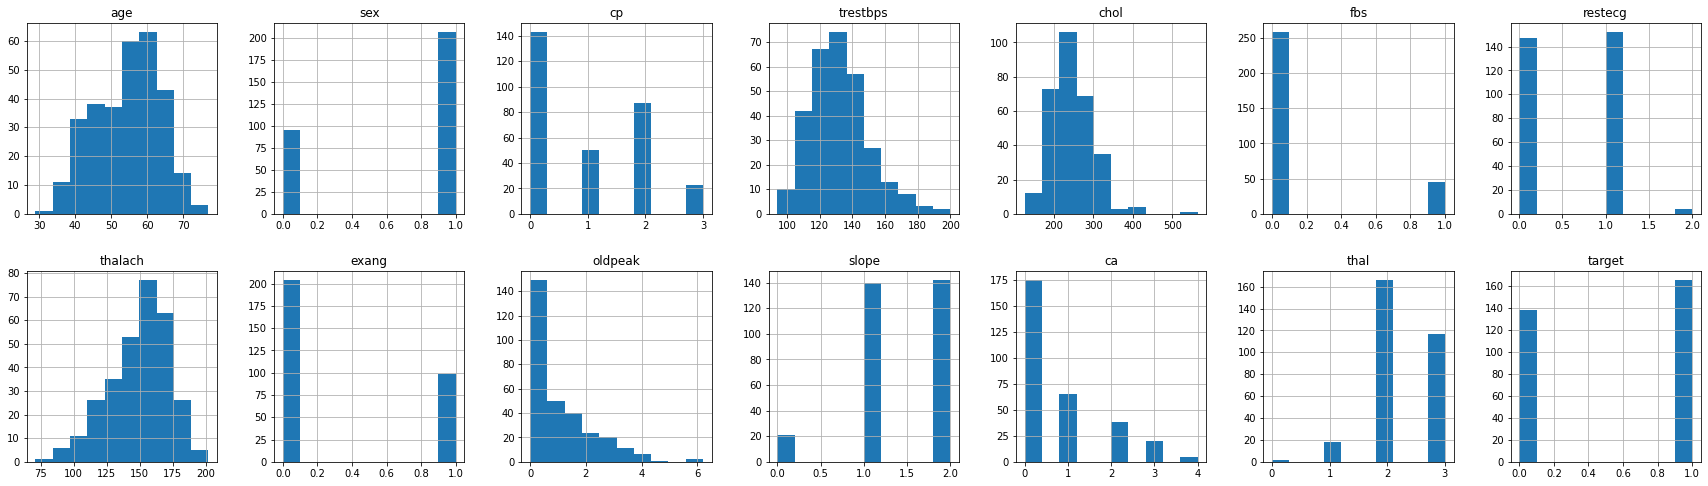

In [15]:
heart_data.hist(figsize=(30,40), layout=(9,7));

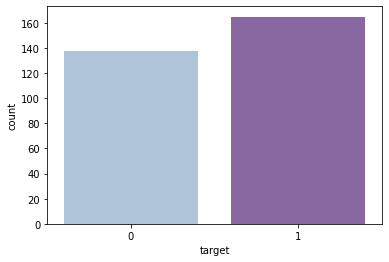

In [16]:
#only for target column
sns.countplot(x='target',palette='BuPu', data=heart_data)

**SCALING THE DATA**

In [17]:
StandardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
heart_data[columns_to_scale] = StandardScaler.fit_transform(heart_data[columns_to_scale])

In [18]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


**SPLITTING THE FEATURES AND TARGET**

In [19]:
X = heart_data.drop(columns = 'target', axis = 1)
Y = heart_data['target']

In [20]:
print(X)

          age  sex  cp  trestbps      chol  ...  exang   oldpeak  slope  ca  thal
0    0.952197    1   3  0.763956 -0.256334  ...      0  1.087338      0   0     1
1   -1.915313    1   2 -0.092738  0.072199  ...      0  2.122573      0   0     2
2   -1.474158    0   1 -0.092738 -0.816773  ...      0  0.310912      2   0     2
3    0.180175    1   1 -0.663867 -0.198357  ...      0 -0.206705      2   0     2
4    0.290464    0   0 -0.663867  2.082050  ...      1 -0.379244      2   0     2
..        ...  ...  ..       ...       ...  ...    ...       ...    ...  ..   ...
298  0.290464    0   0  0.478391 -0.101730  ...      1 -0.724323      1   0     3
299 -1.033002    1   3 -1.234996  0.342756  ...      0  0.138373      1   0     3
300  1.503641    1   0  0.706843 -1.029353  ...      0  2.036303      1   2     3
301  0.290464    1   0 -0.092738 -2.227533  ...      1  0.138373      1   1     3
302  0.290464    0   1 -0.092738 -0.198357  ...      0 -0.896862      1   1     2

[303 rows x 13 

In [21]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


**SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA**

In [22]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3, random_state= 40) 

In [23]:
print('X_train-',X_train.size)
print('X_test-',X_test.size)
print('Y_train-',Y_train.size)
print('Y_test-',Y_test.size)

X_train- 2756
X_test- 1183
Y_train- 212
Y_test- 91


In [24]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (212, 13) (91, 13)


** MODEL TRAINING**
 
** LOGISTIC REGRESSION**

In [38]:
lr= LogisticRegression()

model=lr.fit(X_train,  Y_train)
prediction1=model.predict(X_test)

**CONFUSION MATRIX**

In [39]:
cm=confusion_matrix(Y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]])

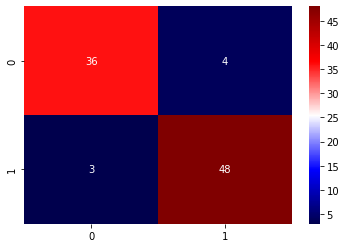

In [40]:
sns.heatmap(cm, annot=True, cmap='seismic')

Here it shows that 36 cases are highly predictive by this algorithm

**TESTING ACCURACY**

In [41]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:', (TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9230769230769231


**MODEL EVALUATION** 

**ACCURACY SCORE**

In [42]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [43]:
print("Accuracy on Training data : ", training_data_accuracy)

Accuracy on Training data :  0.8301886792452831


In [44]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [45]:
print("Accuracy on Test data : ", test_data_accuracy)

Accuracy on Test data :  0.9230769230769231


**BUILDING A PREDICTIVE SYSTEM**

In [46]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

#Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshaping the numpy array for 1 instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction [0] == 0 ):
  print("The Person does not have a Heart Disease")
else:
  print("The Person has Heart Disease")  

[1]
The Person has Heart Disease


**- By SUMIT GAWANDE**